In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC

In [2]:
df = pd.read_csv(r"C:\Users\PIYUSH\DA\ML\CART\brain_stroke.csv")

In [308]:
df1 = pd.read_csv(r"C:\Users\PIYUSH\DA\ML\CART\brain_stroke.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
df.shape

(4981, 11)

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


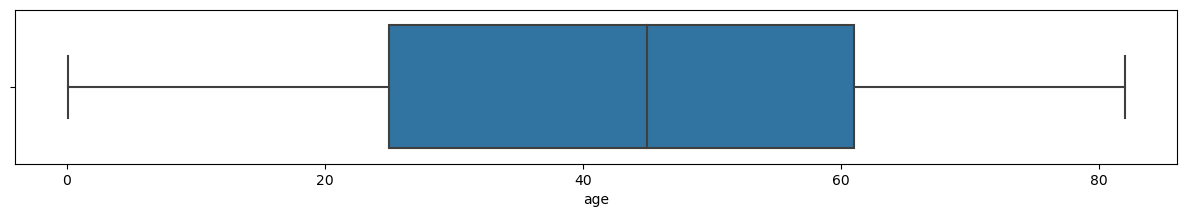

In [10]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df['age'])
plt.show()

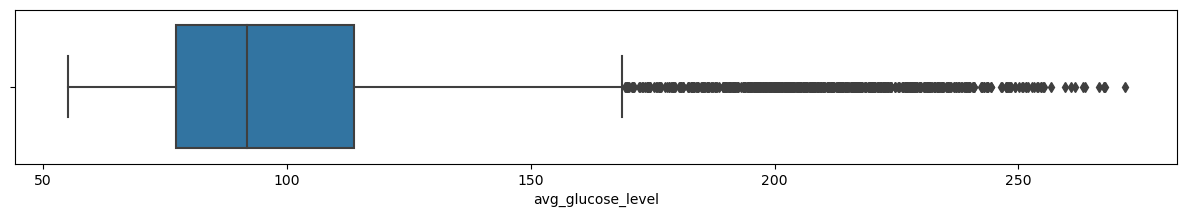

In [11]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df['avg_glucose_level'])
plt.show()

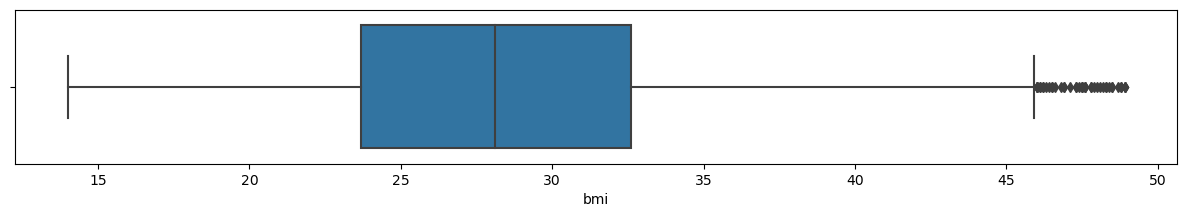

In [12]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df['bmi'])
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [18]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


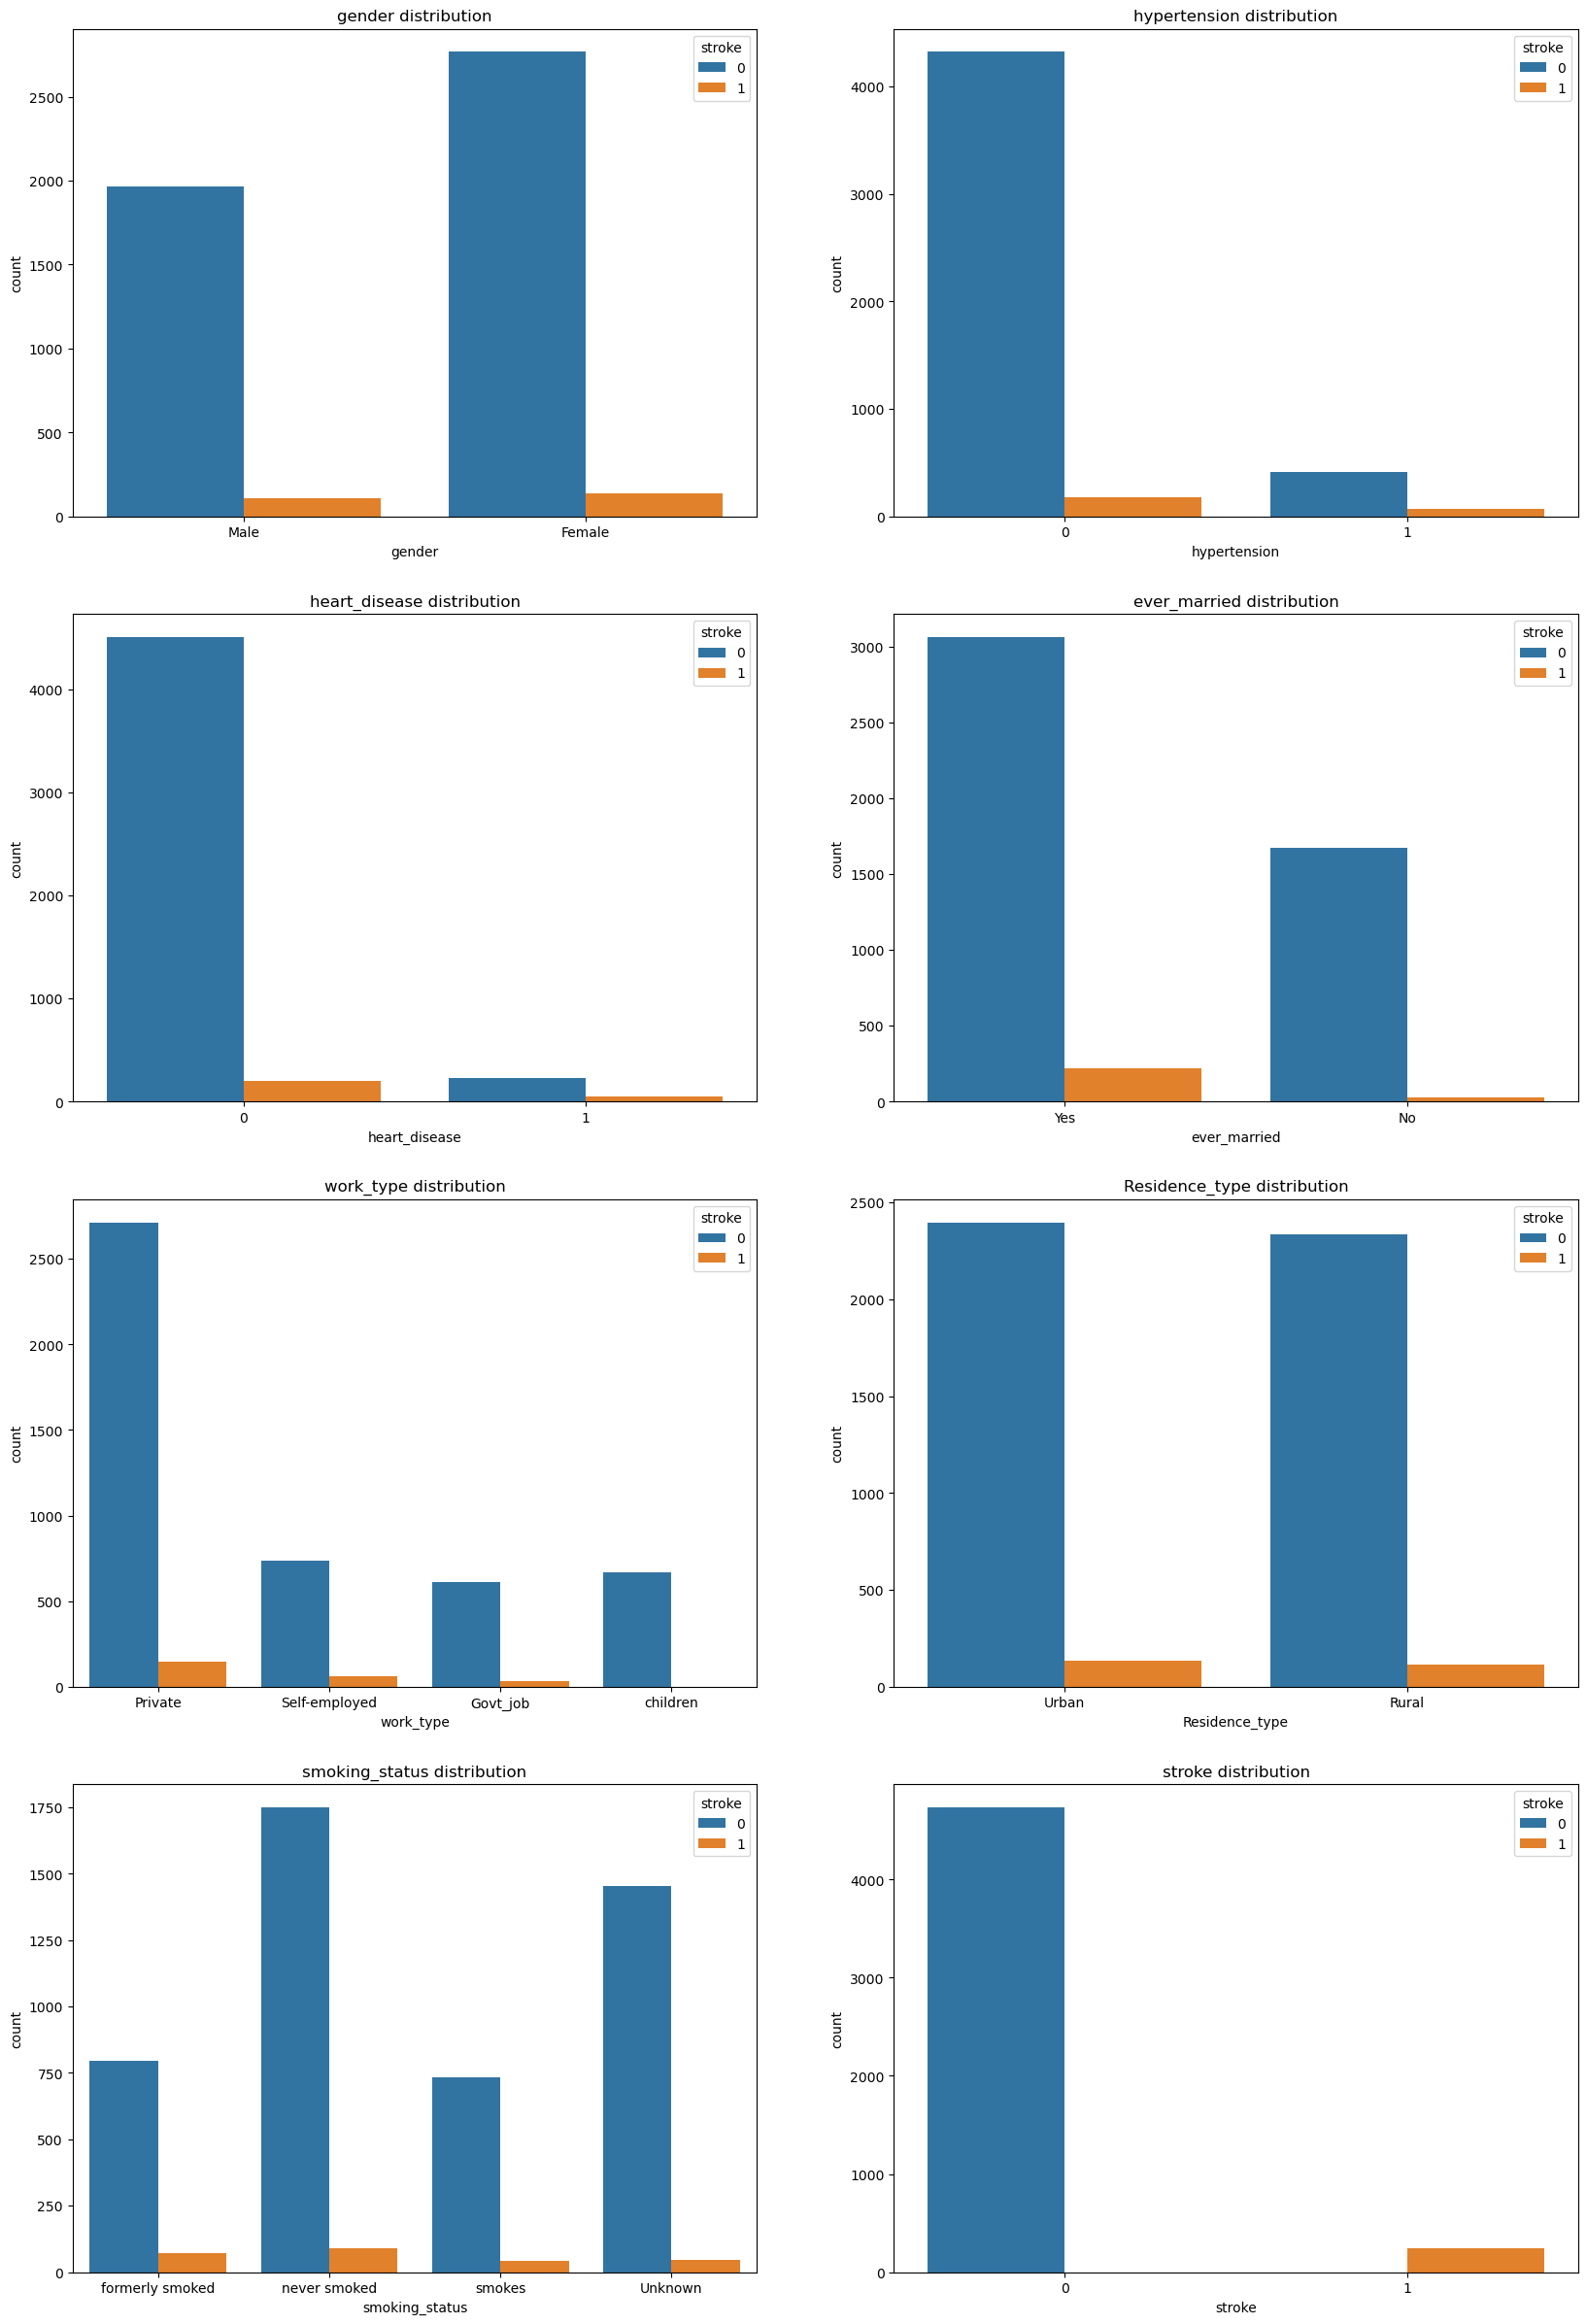

In [401]:
fig, ax = plt.subplots(4,2, figsize=(20,30))
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
ax = ax.flatten()

for i, col in enumerate(df1[columns]):
    sns.countplot(x=df1[col], ax=ax[i], hue=df1['stroke'])
    ax[i].set_title(f'{col} distribution')

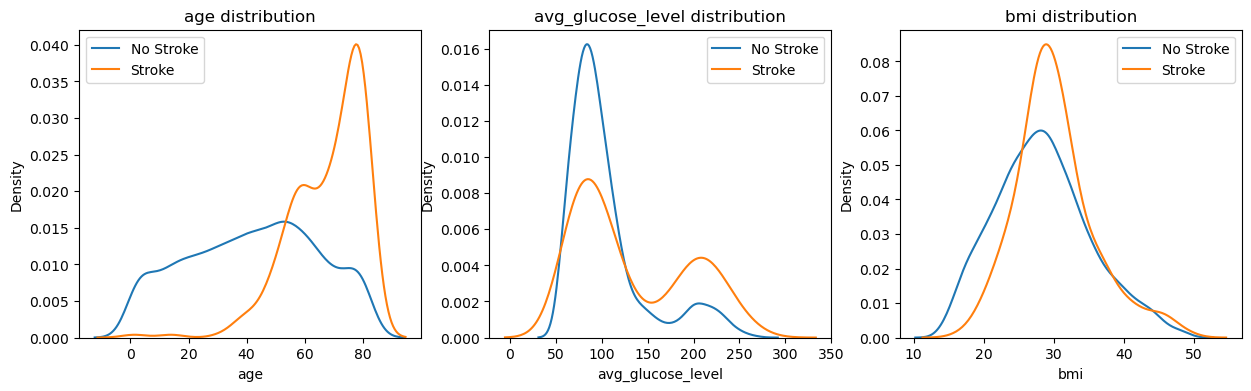

In [405]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax = ax.flatten()
num_columns = ['age', 'avg_glucose_level', 'bmi']

for i, col in enumerate(df1[num_columns]):
    sns.kdeplot(df1[df1['stroke'] == 0][col], label='No Stroke', ax=ax[i])
    sns.kdeplot(df1[df1['stroke'] == 1][col], label='Stroke', ax=ax[i])
    ax[i].set_title(f'{col} distribution')
    ax[i].legend()

In [19]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

In [21]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [23]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [24]:
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3})

In [27]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [28]:
df['Residence_type'] = df['Residence_type'].map({'Urban': 0, 'Rural': 1})

In [29]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [30]:
df['smoking_status'] = df['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

In [31]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.6,0,1
1,1,80.0,0,1,1,0,1,105.92,32.5,1,1
2,0,49.0,0,0,1,0,0,171.23,34.4,2,1
3,0,79.0,1,0,1,1,1,174.12,24.0,1,1
4,1,81.0,0,0,1,0,0,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,0,1,70.15,29.8,0,0
4977,1,40.0,0,0,1,0,0,191.15,31.1,2,0
4978,0,45.0,1,0,1,2,1,95.02,31.8,2,0
4979,1,40.0,0,0,1,0,1,83.94,30.0,2,0


In [32]:
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [33]:
scaler = StandardScaler()
scaler_cols=pd.DataFrame(scaler.fit_transform(df[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [41]:
df = pd.concat([df.drop(columns = numerical_cols), scaler_cols], axis = 1)

In [42]:
df

,gender,ever_married,work_type,Residence_type,smoking_status,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,0,0,0,1,1.040584,-0.326186,4.136753,2.723411,1.193238
1,1,1,0,1,1,1,1.614270,-0.326186,4.136753,-0.000523,0.589390
2,0,1,0,0,2,1,0.246250,-0.326186,-0.241735,1.448529,0.869222
3,0,1,1,1,1,1,1.570141,3.065738,-0.241735,1.512650,-0.662492
4,1,1,0,0,0,1,1.658400,-0.326186,-0.241735,1.780895,0.073909
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,0,0,1,0,0,-0.106788,-0.326186,-0.241735,-0.794162,0.191733
4977,1,1,0,0,2,0,-0.150917,-0.326186,-0.241735,1.890500,0.383197
4978,0,1,2,1,2,0,0.069731,3.065738,-0.241735,-0.242364,0.486294
4979,1,1,0,1,2,0,-0.150917,-0.326186,-0.241735,-0.488199,0.221189


In [45]:
X = df.drop('stroke', axis=1)
y = df['stroke']

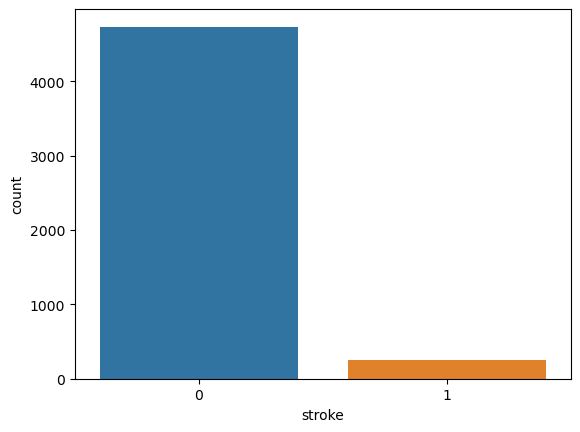

In [64]:
sns.countplot(x=df['stroke'])
plt.show()

In [63]:
#pip install -U imbalanced-learn

                                              0.0/235.6 kB ? eta -:--:--
     -                                        10.2/235.6 kB ? eta -:--:--
     -                                        10.2/235.6 kB ? eta -:--:--
     -                                        10.2/235.6 kB ? eta -:--:--
     ------                                41.0/235.6 kB 195.7 kB/s eta 0:00:01
     ------                                41.0/235.6 kB 195.7 kB/s eta 0:00:01
     ------                                41.0/235.6 kB 195.7 kB/s eta 0:00:01
     ------------------                   122.9/235.6 kB 379.3 kB/s eta 0:00:01
     ---------------------                143.4/235.6 kB 425.3 kB/s eta 0:00:01
     ---------------------                143.4/235.6 kB 425.3 kB/s eta 0:00:01
     ---------------------                143.4/235.6 kB 425.3 kB/s eta 0:00:01
     -------------------------------      204.8/235.6 kB 414.8 kB/s eta 0:00:01
     ------------------------------------ 235.6/235.6 kB 436.8 kB

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
smote = SMOTE(random_state=42)

In [69]:
X_oversample, y_oversample = smote.fit_resample(X, y)

In [74]:
X = X_oversample
y = y_oversample

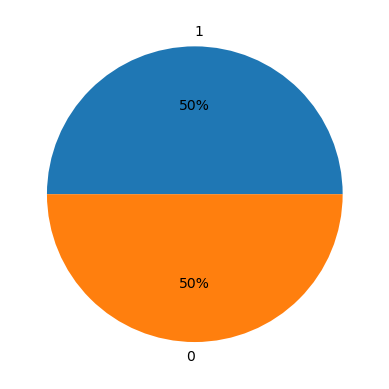

In [102]:
plt.pie(y.value_counts(), labels=y.unique(), autopct='%g%%')
plt.show()

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
loR_model = LogisticRegression()

In [166]:
loR_model.fit(X_train, y_train)

LogisticRegression()

In [167]:
loR_y_pred = loR_model.predict(X_test)

In [168]:
loR_model.score(X_test, y_test)

0.7946145723336854

In [298]:
loR_acc = accuracy_score(y_test, loR_y_pred)

In [169]:
print(classification_report(y_test, loR_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       941
           1       0.77      0.84      0.81       953

    accuracy                           0.79      1894
   macro avg       0.80      0.79      0.79      1894
weighted avg       0.80      0.79      0.79      1894



In [170]:
cm = confusion_matrix(y_test, loR_y_pred)

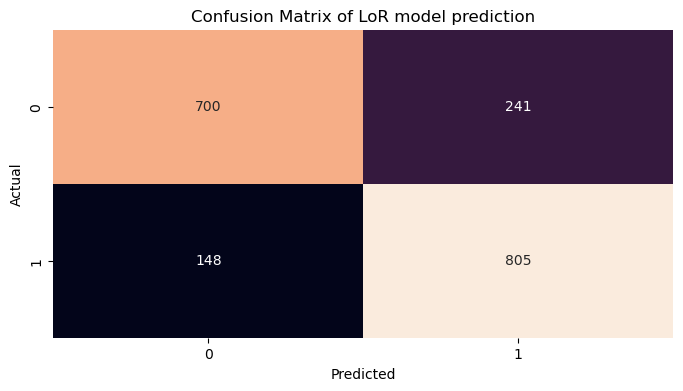

In [171]:
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LoR model prediction')
plt.show()

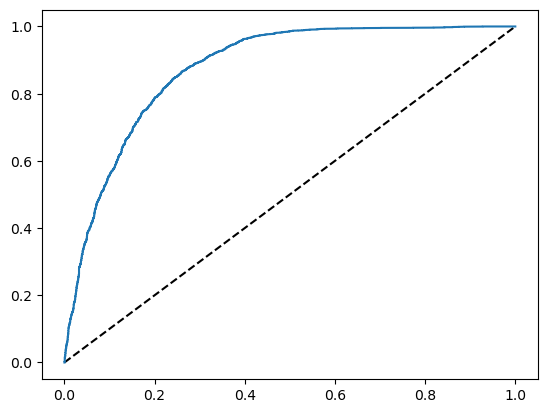

In [172]:
loR_roc = loR_model.predict_proba(X_train)[:,1]

fpr, tpr, threshold = roc_curve(y_train, loR_roc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='logistic')
plt.show()

## Grid Search

In [175]:
param_grid = {
    'penalty':['l1', 'l2'],
    'C' : [0.1, 0.5, 1, 5, 10]
}

In [177]:
loR_grid = GridSearchCV(estimator = loR_model, param_grid = param_grid, cv=5)

In [178]:
loR_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [179]:
best_param = loR_grid.best_params_
best_model = loR_grid.best_estimator_

In [182]:
best_loR_y_pred = best_model.predict(X_test)

In [296]:
loR_grid_acc = accuracy_score(y_test, best_loR_y_pred)

In [183]:
print(classification_report(y_test, best_loR_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       941
           1       0.77      0.85      0.81       953

    accuracy                           0.80      1894
   macro avg       0.80      0.80      0.79      1894
weighted avg       0.80      0.80      0.80      1894



## Randomized Search

In [284]:
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 100),
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'random_state': [42]
}


In [285]:
loR_random_search = RandomizedSearchCV(estimator=loR_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

In [286]:
loR_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-...
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                                        'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [42]},
                   random_state=42, scoring='accuracy')

In [289]:
loR_ran_best_params = loR_random_search.best_params_
loR_ran_best_model = loR_random_search.best_estimator_

print("Best Parameters:", loR_ran_best_params)
print("Best model:", loR_ran_best_model)

Best Parameters: {'random_state': 42, 'penalty': 'l2', 'fit_intercept': False, 'class_weight': 'balanced', 'C': 0.02848035868435802}
Best model: LogisticRegression(C=0.02848035868435802, class_weight='balanced',
                   fit_intercept=False, random_state=42)


In [291]:
loR_ran_pred = loR_ran_best_model.predict(X_test)

In [294]:
loR_ran_acc = accuracy_score(y_test, loR_y_pred)

In [292]:
print(classification_report(y_test, loR_ran_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       941
           1       0.76      0.85      0.80       953

    accuracy                           0.79      1894
   macro avg       0.80      0.79      0.79      1894
weighted avg       0.80      0.79      0.79      1894



# SVM

In [186]:
svcm = SVC()

In [187]:
svcm.fit(X_train, y_train)

SVC()

In [189]:
svcm_y_pred = svcm.predict(X_test)

In [283]:
svm_acc = accuracy_score(y_test, svcm_y_pred)

In [190]:
print(classification_report(y_test, svcm_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       941
           1       0.78      0.91      0.84       953

    accuracy                           0.83      1894
   macro avg       0.84      0.83      0.83      1894
weighted avg       0.84      0.83      0.83      1894



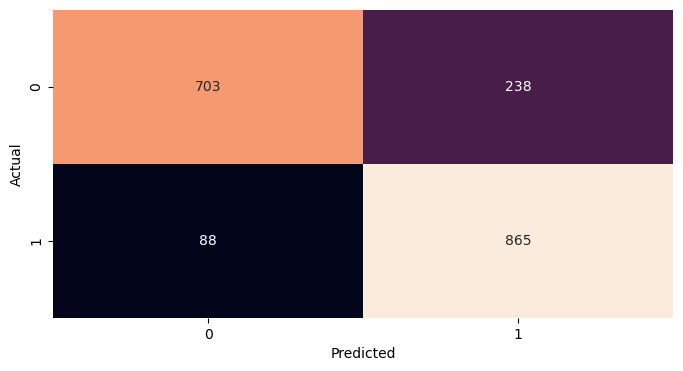

In [194]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, svcm_y_pred), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [196]:
from sklearn.multiclass import OneVsRestClassifier

In [201]:
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=100))

In [202]:
classifier_y_score=classifier.fit(X_train,y_train).decision_function(X_test)

In [207]:
classifier_y_score

array([-2.56020126,  1.46135049,  1.69627727, ...,  0.49986347,
       -2.66839879,  0.41967197])

In [211]:
fpr=dict()
tpr=dict()
roc_auc = dict()
for i in df['stroke'].unique():
    classifier_y_score = classifier.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test, classifier_y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

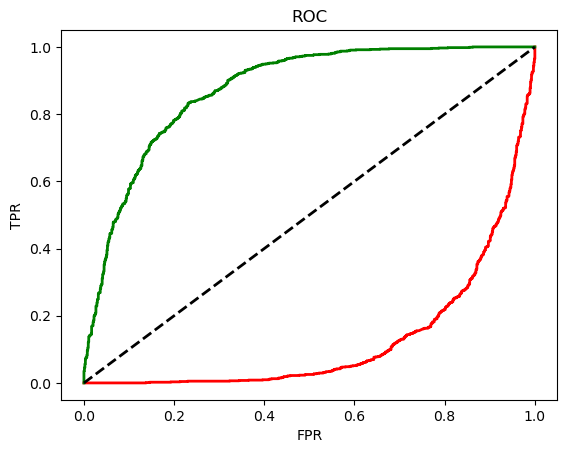

In [213]:
plt.figure()
color = ['red', 'green']
for i, color in zip(range(2),color):
    plt.plot (fpr[i], tpr[i], color=color, lw=2)
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

##  Grid Search

In [218]:
svm_param_grid = {'C': [0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, refit = True, verbose = 3)

In [219]:
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.799 total time=   1.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.811 total time=   1.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.789 total time=   1.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.795 total time=   1.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.801 total time=   1.5s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.853 total time=  11.8s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.857 total time=   9.8s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.839 total time=  11.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.848 total time=  11.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.841 total time=  11.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.560 total time=   2.5s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.812 total time=   2.1s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.789 total time=   2.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.797 total time=   2.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.801 total time=   2.0s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.859 total time= 2.0min
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.861 total time= 1.5min
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.843 total time= 1.7min
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.850 total time= 1.8min
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.846 total time= 1.6min
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.558 total time=   2.6s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.579 total time=   2.7s
[CV 3/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.567 total time=   3.0s
[CV 4/5] END ......C=1, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             verbose=3)

In [220]:
svm_grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [221]:
svm_grid.best_estimator_

SVC(C=1, gamma=1)

In [222]:
svm_grid_pred = svm_grid.predict(X_test)

In [281]:
svm_grid_acc = accuracy_score(y_test, svm_grid_pred)

In [223]:
print(classification_report(y_test, svm_grid_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       941
           1       0.87      0.95      0.91       953

    accuracy                           0.91      1894
   macro avg       0.91      0.91      0.91      1894
weighted avg       0.91      0.91      0.91      1894



##  Randomized Search

In [224]:
from scipy.stats import uniform

In [226]:
svm_ran = SVC()
param_dist={'C': uniform(loc=0, scale=10),
            'gamma': ['scale', 'auto'] + list (uniform(loc=0, scale=1). rvs (10)),
           'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [227]:
svm_random_search = RandomizedSearchCV(svm_ran, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)
svm_random_search.fit(X_train, y_train) 

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000232D4005050>,
                                        'gamma': ['scale', 'auto',
                                                  0.3478047740643144,
                                                  0.7535214903130186,
                                                  0.9669255030470101,
                                                  0.5343982764474337,
                                                  0.14449867880025336,
                                                  0.14677734750245586,
                                                  0.5115154094278623,
                                                  0.9587153942108921,
                                                  0.592416800949808,
                                                  0.7468475594366226],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [228]:
svm_random_search.best_params_

{'C': 6.473713204563891, 'gamma': 0.9587153942108921, 'kernel': 'poly'}

In [229]:
sv_ran_best_model = svm_random_search.best_estimator_

In [230]:
svm_ran_search_pred = best_model.predict(X_test)

In [279]:
svm_ran_acc = accuracy_score(y_test, svm_ran_search_pred)

In [231]:
print(classification_report(y_test, svm_ran_search_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       941
           1       0.77      0.85      0.81       953

    accuracy                           0.80      1894
   macro avg       0.80      0.80      0.79      1894
weighted avg       0.80      0.80      0.80      1894



# KNN 

In [235]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
knn = KNeighborsClassifier(n_neighbors=10)

In [237]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [239]:
knn_y_pred = knn.predict(X_test)

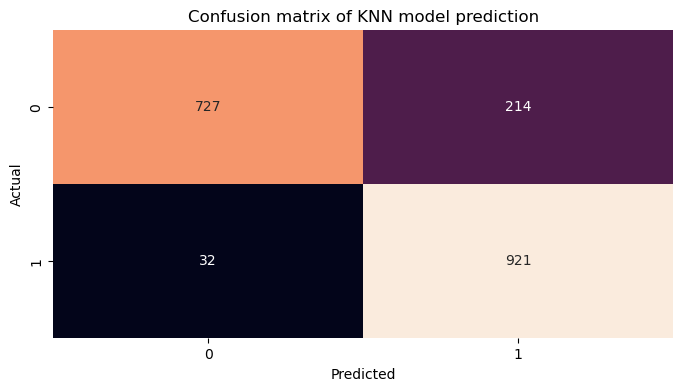

In [242]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of KNN model prediction')
plt.show()

In [277]:
knn_acc = accuracy_score(y_test, knn_y_pred)

In [240]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       941
           1       0.81      0.97      0.88       953

    accuracy                           0.87      1894
   macro avg       0.88      0.87      0.87      1894
weighted avg       0.88      0.87      0.87      1894



##  Grid Search

In [243]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [244]:
knn_grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

In [245]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [252]:
knn_best_params = knn_grid_search.best_params_
knn_best_model = knn_grid_search.best_estimator_

In [253]:
knn_best_params

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [255]:
knn_best_model

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [257]:
knn_best_model_pred = knn_best_model.predict(X_test)

In [275]:
knn_grid_acc = accuracy_score(y_test, knn_best_model_pred)

In [258]:
print(classification_report(y_test, knn_best_model_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.88       941
           1       0.84      0.98      0.90       953

    accuracy                           0.90      1894
   macro avg       0.91      0.89      0.89      1894
weighted avg       0.91      0.90      0.89      1894



##  Randomized Search

In [259]:
param_dist = {
    'n_neighbors': np.arange(1, 21), 
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [261]:
knn_random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

In [262]:
knn_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [263]:
knn_best_param1 = knn_random_search.best_params_

In [264]:
knn_best_model1 = knn_random_search.best_estimator_

In [266]:
knn_best_model1_pred = knn_best_model1.predict(X_test)

In [273]:
knn_ran_acc = accuracy_score(y_test, knn_best_model1_pred)

In [267]:
print(classification_report(y_test, knn_best_model1_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       941
           1       0.87      0.98      0.92       953

    accuracy                           0.92      1894
   macro avg       0.92      0.92      0.92      1894
weighted avg       0.92      0.92      0.92      1894



# CONCLUSION

In [303]:
result = pd.DataFrame({'Model':['LoR', 'SVM', 'KNN'],
                       'Accuracy':[loR_acc, svm_acc, knn_acc],
                       'Grid Search':[loR_grid_acc, svm_grid_acc, knn_grid_acc],
                       'Randomized Search':[loR_ran_acc, svm_ran_acc, knn_ran_acc]})

In [304]:
result

,Model,Accuracy,Grid Search,Randomized Search
0,LoR,0.794615,0.795671,0.794615
1,SVM,0.827878,0.907603,0.795671
2,KNN,0.870116,0.895459,0.916579
